# Product search and query

<div>
    <img style='width: 220px;height: 100px;float: left;' src="./Supplementary_data/EODC-Logo-Final.png" height='130p' width='180p'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='130p' width='180p'/> 
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/bmlv.svg" height='130p' width='180p'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/LOGO_TUW_GEO.png" height='130p' width='180p'/>
    <img style='width: 100px;height: 100px;float: left;' src="./Supplementary_data/Boku-wien.svg" height='130p' width='180p'/>
    <img style='width: 150px;height: 100px;float: right;' src="./Supplementary_data/ADC_Logo_final_transparent.png" height='130p' width='180p'/>
</div>

This notebok shows how to explore products and query for datasets in ACube. Currently the ACube hosts Sentinel 1 and Sentinel 2 high level products that may be used for further processing and analysis. Additionally it is shown how to plot the queried datasets and how to download the data.

## Exploring products

The first step is to import the datacube package and initialize the application. The `app` parameter is an optional name to discern different applications.

In [1]:
import datacube
acube = datacube.Datacube(app='sample_1')

To list the products we call the `acube.list_products()` method which lists the products in a table. The `dropna(axis=1)` shows only filled columns. The columns are:

* `name` - shows the name of the product. This field is used for querying the products
* `description` - Shows a short description of the product. Not fully shown for display purposes
* `format` - Format in which the data are stored
* `instrument` - Instrument used in capturing the product
* `platform` - Satelite platform used in capturing the product
* `resolution` - Spatial resolution of the product

```python
import pandas as pd
pd.set_option('display.max_colwidth', -1)
```

In [2]:
acube.list_products().dropna(axis=1)

name                                        description  \
id                                                                            
1           B_Sentinel_2         Atmospherically corrected Sentinel 2 bands   
2   CLOUDMASK_Sentinel_2            Cloud mask and buffer derived from SCL.   
24  COPERNICUS_EUDEM_V11  EU-DEM v1.0 is a digital surface model (DSM) o...   
3       FAPAR_Sentinel_2    Fraction of Photosynthetically Active Radiation   
4      FCOVER_Sentinel_2                       Fraction of vegetation cover   
13        GMR_Sentinel_1  Backscatter from a unit ground area projected ...   
5         LAI_Sentinel_2                                    Leaf Area Index   
6          MB_Sentinel_2  Monthly composite atmospherically corrected Se...   
7      MFAPAR_Sentinel_2                            Monthly composite FAPAR   
8     MFCOVER_Sentinel_2                           Monthly composite FCOVER   
9        MLAI_Sentinel_2                              Monthly composite LAI   
14    MMENGMR_Sentinel_1                               Monthly mean of GMR.   
15   MMENSIG0_Sentinel_1                              Monthly mean of SIG0.   
10       MTCI_Sentinel_2                 Monthly composite True Color Image   
11        SCL_Sentinel_2                         Scene Classification Layer   
16   SCOMP003_Sentinel_1  Spring composite (VV of March (R), VH of April...   
17   SCOMP004_Sentinel_1  Summer composite (VV of June (R), VH of July (...   
18   SCOMP005_Sentinel_1  Autumn composite (VV of September (R), VH of O...   
19   SCOMP006_Sentinel_1  Winter composite (VV of December (R), VH of Ja...   
20   SCOMP007_Sentinel_1  VH summer composite (VH of June (R), VH of Jul...   
21       SIG0_Sentinel_1  Backscatter returned to the satellites antenna...   
22   SSMNOISE_Sentinel_1  Noise of the relative surface soil moisture es...   
23        SSM_Sentinel_1                    Relative surface soil moisture.   
12        TCI_Sentinel_2                                   True Color Image   

     format    platform instrument       product_type  \
id                                                      
1   GeoTIFF  Sentinel-2        MSI          BOKU_B_S2   
2   GeoTIFF  Sentinel-2        MSI  BOKU_CLOUDMASK_S2   
24  GeoTIFF   SRTM,GDEM  SRTM,GDEM                DEM   
3   GeoTIFF  Sentinel-2        MSI      BOKU_FAPAR_S2   
4   GeoTIFF  Sentinel-2        MSI     BOKU_FCOVER_S2   
13  GeoTIFF  Sentinel-1        SAR         TUW_GMR_S1   
5   GeoTIFF  Sentinel-2        MSI        BOKU_LAI_S2   
6   GeoTIFF  Sentinel-2        MSI         BOKU_MB_S2   
7   GeoTIFF  Sentinel-2        MSI     BOKU_MFAPAR_S2   
8   GeoTIFF  Sentinel-2        MSI    BOKU_MFCOVER_S2   
9   GeoTIFF  Sentinel-2        MSI       BOKU_MLAI_S2   
14  GeoTIFF  Sentinel-1        SAR     TUW_MMENGMR_S1   
15  GeoTIFF  Sentinel-1        SAR    TUW_MMENSIG0_S1   
10  GeoTIFF  Sentinel-2        MSI       BOKU_MTCI_S2   
11  GeoTIFF  Sentinel-2        MSI        BOKU_SCL_S2   
16  GeoTIFF  Sentinel-1        SAR   TUW_S-COMP003_S1   
17  GeoTIFF  Sentinel-1        SAR   TUW_S-COMP004_S1   
18  GeoTIFF  Sentinel-1        SAR   TUW_S-COMP005_S1   
19  GeoTIFF  Sentinel-1        SAR   TUW_S-COMP006_S1   
20  GeoTIFF  Sentinel-1        SAR   TUW_S-COMP007_S1   
21  GeoTIFF  Sentinel-1        SAR        TUW_SIG0_S1   
22  GeoTIFF  Sentinel-1        SAR   TUW_SSM-NOISE_S1   
23  GeoTIFF  Sentinel-1        SAR         TUW_SSM_S1   
12  GeoTIFF  Sentinel-2        MSI        BOKU_TCI_S2   

                                                  crs   resolution  \
id                                                                   
1   PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS...    [-10, 10]   
2   PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS...    [-10, 10]   
24                                          EPSG:3035    [-25, 25]   
3   PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS...    [-10, 10]   
4   PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS...    [-10,

## Querying datasets and visualizing

To assist in selecting the area we can use `acube_functions` `interactive_plot()` function that draws a map we can use for querying. Simply zoom in on interested area and use the axis in combination with the next code cell.

In [3]:
from acube_functions import interactive_map
interactive_map()

Loading BokehJS ...

Below we specify a `query_product` variable and `query_spatiotemporal` dictionary with spatial parameters for Vienna during the summer of 2017. These variables can be adapted to select a different spatial and temporal range, and a different product.

In [4]:
query_product = 'MTCI_Sentinel_2'
query_spatiotemporal = {
    'lon': (16.35, 16.45),
    'lat': (48.2, 48.3),
    'time': ('2017-05-01', '2017-09-30')
}

To load the data we use `acube.load()` with following parameters:

1. `product` to specify desired product

2. `output_crs` to specify desired coordinate reference frame

3. `resolution` to specify the spatial resolution

4. `**vienna_summer` is the desired spatiotemporal area

Data is loaded into memory in an `xarray.Dataset`

In [5]:
data = acube.load(product=query_product, output_crs='EPSG:32633', resolution=(-10, 10), **query_spatiotemporal)
data

<xarray.Dataset>
Dimensions:  (time: 5, x: 764, y: 1126)
Coordinates:
  * time     (time) datetime64[ns] 2017-05-16 ... 2017-09-15T12:00:00
  * y        (y) float64 5.351e+06 5.351e+06 5.351e+06 ... 5.339e+06 5.339e+06
  * x        (x) float64 6.001e+05 6.001e+05 6.001e+05 ... 6.077e+05 6.077e+05
Data variables:
    B02      (time, y, x) uint8 89 94 113 117 149 132 96 ... 122 89 43 42 47 39
    B03      (time, y, x) uint8 89 90 112 119 152 119 86 ... 116 106 57 55 64 54
    B04      (time, y, x) uint8 74 88 94 107 129 99 77 ... 91 92 76 39 39 46 37
Attributes:
    crs:      EPSG:32633

For plotting we import the `plot` function from `acube_functions` and call it on the desired data. `%matplotlib inline` is necessary for output to be visible inside the notebook. Tutorials on `matplotlib` can be found at https://matplotlib.org/tutorials/index.html

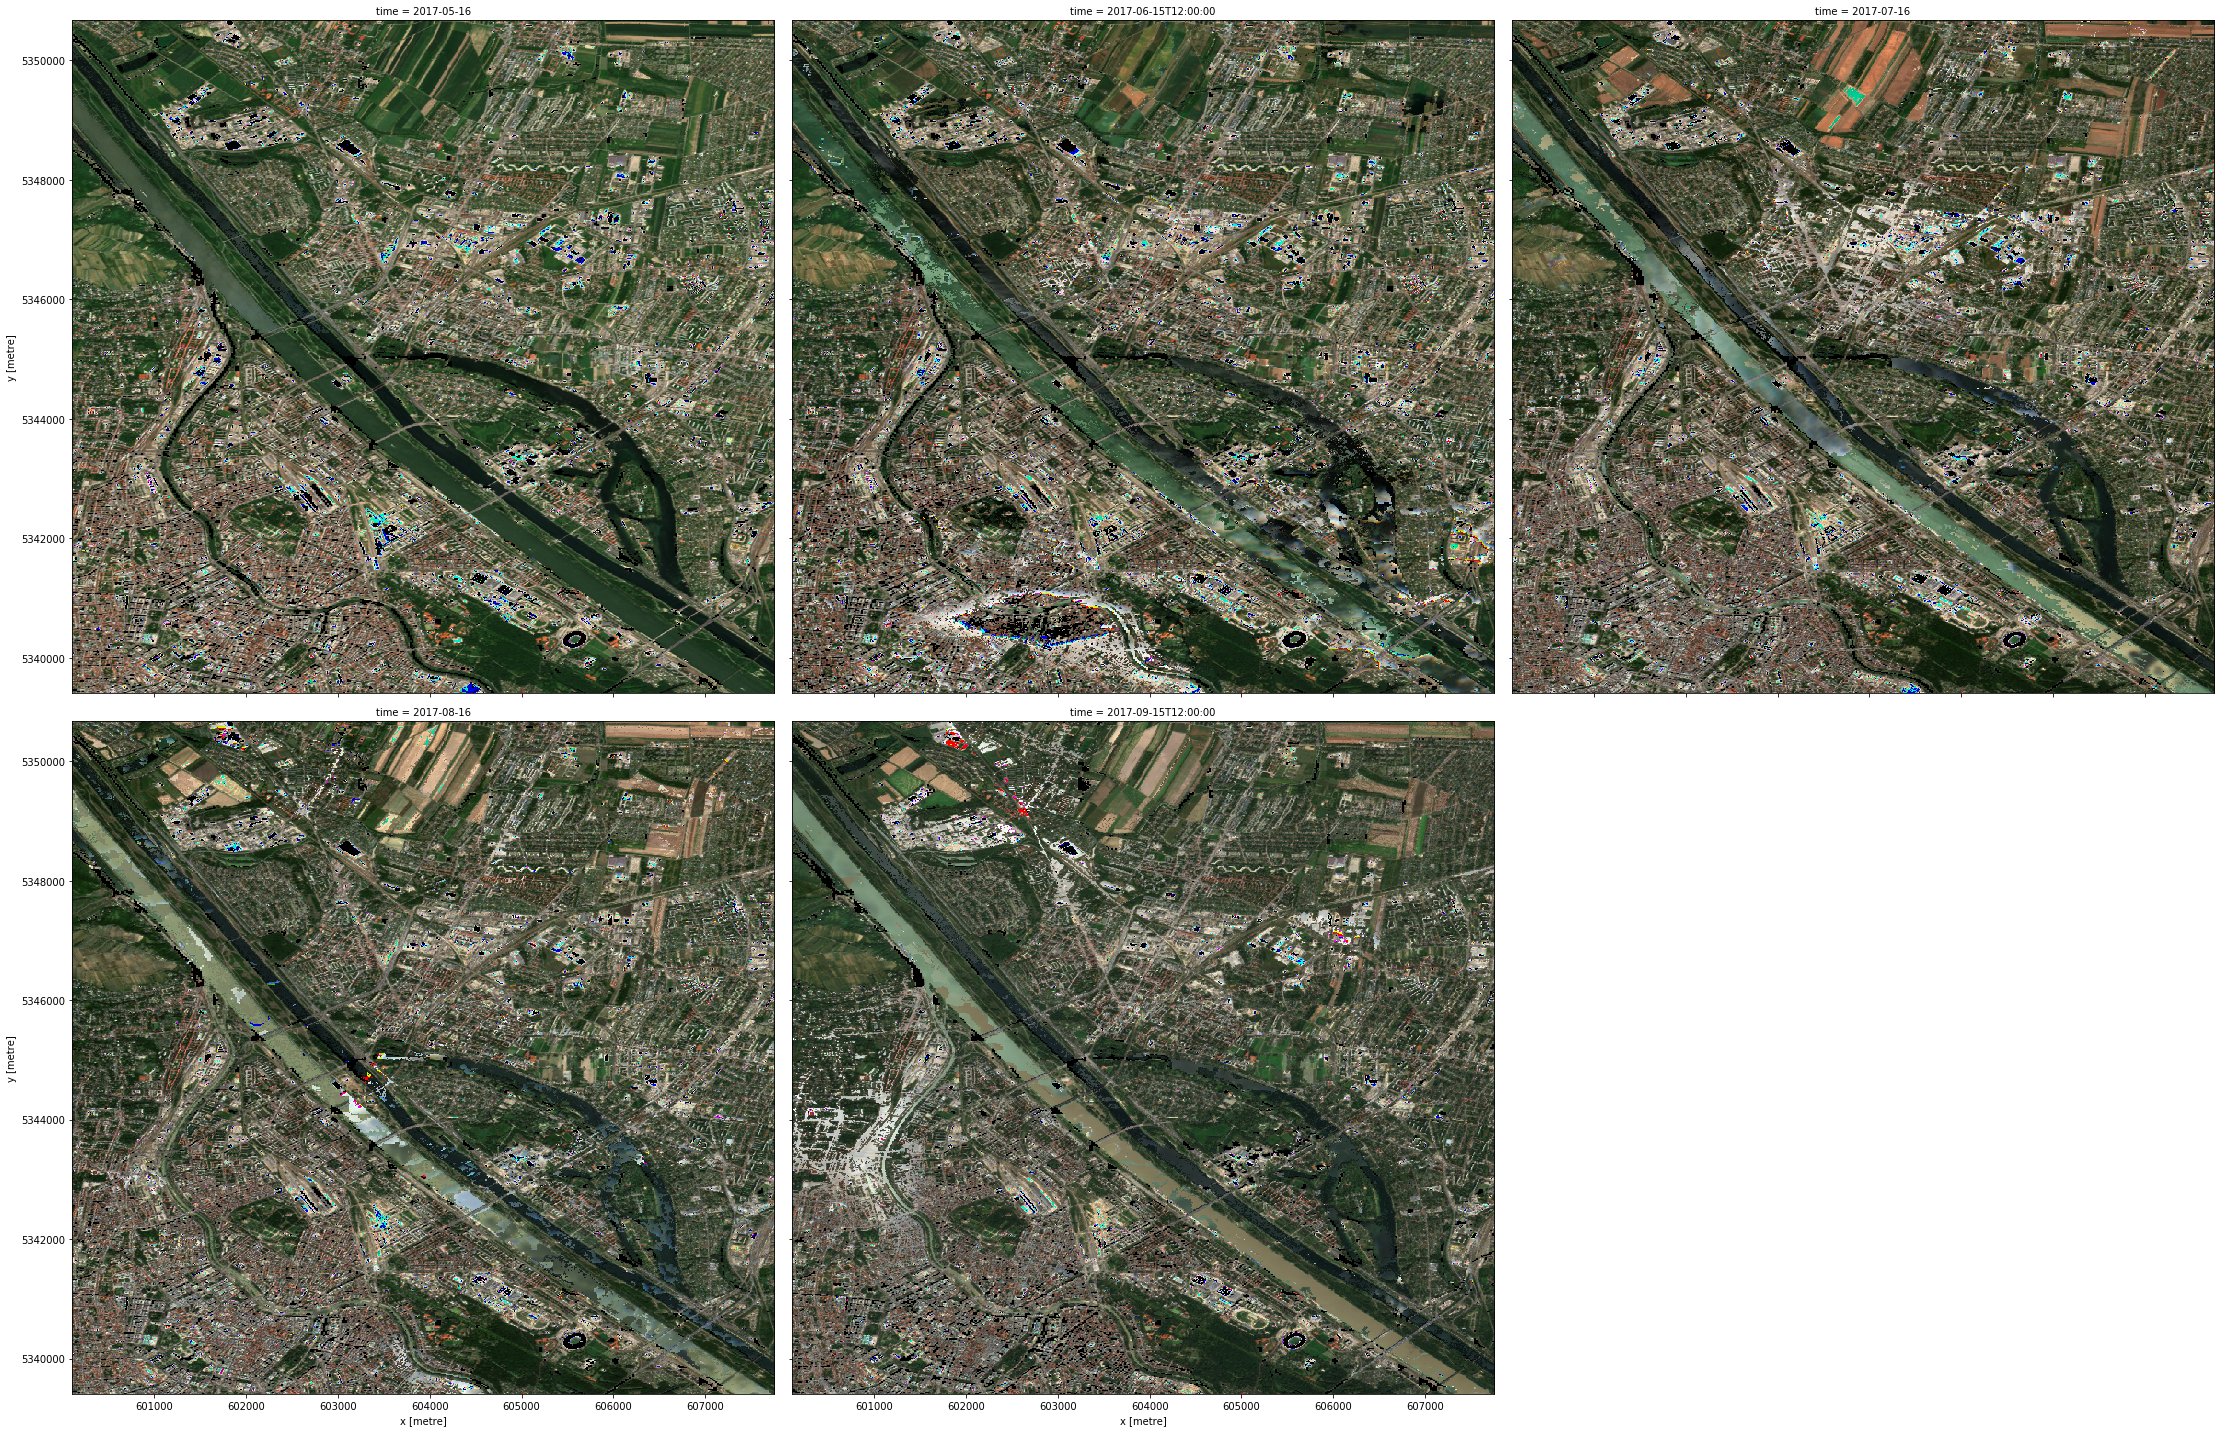

In [6]:
from acube_functions import plot
%matplotlib inline
plot(data)

## Downloading data

To download a certain timeslice in geotiff we can use the `helpers.write_geotiff` function. By using the `data.isel()` we select the zero indexed time slice which corresponds to the first time slice in the dataset which is the monthly composite for May. We also specify the name.

In [7]:
from datacube import helpers
helpers.write_geotiff('MTCI_MAY.tif', data.isel(time=0))